In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [2]:
doc2vec = pd.read_csv('../results/Evaluating performance/evaluating_performance-doc2vec_kmeans.csv')
sbert = pd.read_csv('../results/Evaluating performance/evaluating_performance-sbert.csv')
tfidf = pd.read_csv('../results/Evaluating performance/evaluating_performance-tfidf.csv')
bow = pd.read_csv('../results/Evaluating performance/evaluating_performance-bow.csv')

In [12]:
all_embeddings = pd.concat([doc2vec, sbert, tfidf, bow], ignore_index=True)

In [3]:
mean_doc2vec = doc2vec.groupby('clustering-algo', as_index=False)[['ARI','AMI','NMI','time']].mean()
mean_sbert = sbert.groupby('clustering-algo', as_index=False)[['ARI','AMI','NMI','time']].mean()
mean_tfidf = tfidf.groupby('clustering-algo', as_index=False)[['ARI','AMI','NMI','time']].mean()
mean_bow = bow.groupby('clustering-algo', as_index=False)[['ARI','AMI','NMI','time']].mean()

In [4]:
mean_tfidf['embedding'] = 'TF-IDF'
mean_sbert['embedding'] = 'Sentence BERT'
mean_doc2vec['embedding'] = 'Doc2Vec'
mean_bow['embedding'] = 'Bag Of Words'

In [5]:
mean_perf = pd.concat([mean_doc2vec, mean_sbert, mean_tfidf, mean_bow], ignore_index=True)

In [6]:
mean_perf

,clustering-algo,ARI,AMI,NMI,time,embedding
0,k-means,0.000064,0.000070,0.000498,13.107097,Doc2Vec
1,BERTopic,0.064128,0.137070,0.137593,497.073876,Sentence BERT
2,k-means,0.519152,0.499055,0.499270,42.013627,Sentence BERT
3,LDA,0.527628,0.509607,0.509818,2322.623555,TF-IDF
4,LSI,0.001938,0.039898,0.040358,26.359052,TF-IDF
5,NMF,0.390923,0.402022,0.402300,1072.171186,TF-IDF
6,k-means,0.152854,0.227686,0.228108,15.674190,TF-IDF
7,LDA,0.530627,0.516904,0.517112,1953.684424,Bag Of Words
8,LSI,0.187384,0.208299,0.208655,10.905951,Bag Of Words
9,NMF,0.170421,0.172203,0.172589,1719.952707,Bag Of Words


In [9]:
# View top-3 best performers
mean_perf.nlargest(3,['ARI','AMI','NMI','time'])

,clustering-algo,ARI,AMI,NMI,time,embedding
7,LDA,0.530627,0.516904,0.517112,1953.684424,Bag Of Words
3,LDA,0.527628,0.509607,0.509818,2322.623555,TF-IDF
2,k-means,0.519152,0.499055,0.499270,42.013627,Sentence BERT


In [10]:
mean_perf.to_csv('../results/Evaluating performance/mean_performance.csv', index=False)

In [11]:
mean_perf.nsmallest(3,['ARI','AMI','NMI','time'])

,clustering-algo,ARI,AMI,NMI,time,embedding
0,k-means,0.000064,0.000070,0.000498,13.107097,Doc2Vec
4,LSI,0.001938,0.039898,0.040358,26.359052,TF-IDF
1,BERTopic,0.064128,0.137070,0.137593,497.073876,Sentence BERT


C:\Users\mbaxi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mbaxi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mbaxi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

Text(0, 0.5, 'Density')

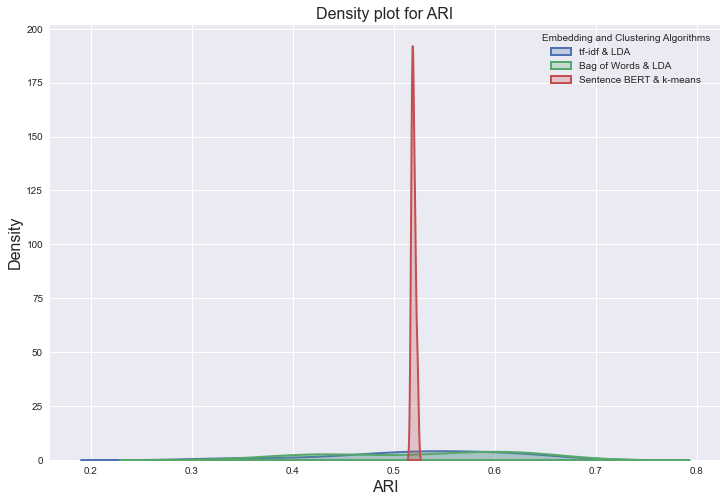

In [41]:
# List of four best performers to plot
embeddings = ['tf-idf','Bag of Words', 'Sentence BERT']
clustering = ['LDA', 'LDA', 'k-means']

plt.figure(figsize=(12,8))

# Iterate through the top 4
for embedding, cluster_algo in zip(embeddings, clustering):
    # Subset to the embedding
    embed_subset = all_embeddings[all_embeddings['feature-extraction'] == embedding]
    combo_subset = embed_subset[embed_subset['clustering-algo'] == cluster_algo]
    combination = embedding +' & '+ cluster_algo
    
    # Draw the density plot
    sns.distplot(combo_subset['ARI'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2, 'shade':True},
                 label = combination)
    
# Plot formatting
plt.legend(title = 'Embedding and Clustering Algorithms')
plt.title('Density plot for ARI', fontsize=16)
plt.xlabel('ARI', fontsize=16)
plt.ylabel('Density', fontsize=16)

C:\Users\mbaxi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mbaxi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mbaxi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

Text(0, 0.5, 'Density')

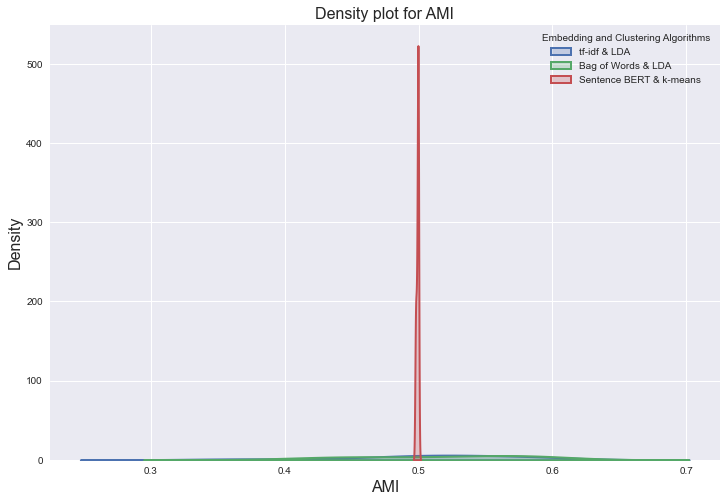

In [38]:
# List of four best performers to plot
embeddings = ['tf-idf','Bag of Words', 'Sentence BERT']
clustering = ['LDA', 'LDA', 'k-means']

plt.figure(figsize=(12,8))

# Iterate through the top 4
for embedding, cluster_algo in zip(embeddings, clustering):
    # Subset to the embedding
    embed_subset = all_embeddings[all_embeddings['feature-extraction'] == embedding]
    combo_subset = embed_subset[embed_subset['clustering-algo'] == cluster_algo]
    combination = embedding +' & '+ cluster_algo
    
    # Draw the density plot
    sns.distplot(combo_subset['AMI'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2, 'shade':True},
                 label = combination)
    
# Plot formatting
plt.legend(title = 'Embedding and Clustering Algorithms')
plt.title('Density plot for AMI', fontsize=16)
plt.xlabel('AMI', fontsize=16)
plt.ylabel('Density', fontsize=16)

C:\Users\mbaxi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mbaxi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

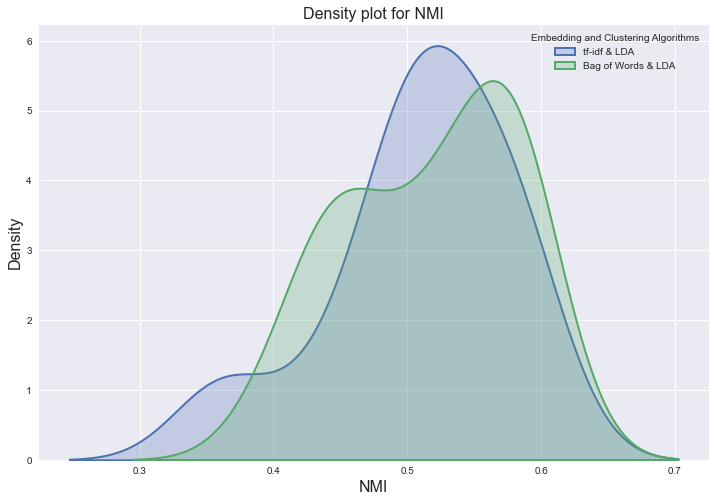

In [39]:
# List of four best performers to plot
embeddings = ['tf-idf','Bag of Words']
clustering = ['LDA', 'LDA']

plt.figure(figsize=(12,8))

# Iterate through the top 4
for embedding, cluster_algo in zip(embeddings, clustering):
    # Subset to the embedding
    embed_subset = all_embeddings[all_embeddings['feature-extraction'] == embedding]
    combo_subset = embed_subset[embed_subset['clustering-algo'] == cluster_algo]
    combination = embedding +' & '+ cluster_algo
    
    # Draw the density plot
    sns.distplot(combo_subset['NMI'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2, 'shade':True},
                 label = combination)
    
# Plot formatting
plt.legend(title = 'Embedding and Clustering Algorithms')
plt.title('Density plot for NMI', fontsize=16)
plt.xlabel('NMI', fontsize=16)
plt.ylabel('Density', fontsize=16)